# **Implement *Frozen Lake* Game Using Q table**
Gym Documentation:
https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
#Game Description:
Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend. The surface is described using a grid like the following:

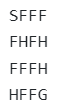

This grid is our environment where S is the agent's starting point, and it's safe. F represents the frozen surface and is also safe. H represents a hole, and if our agent steps in a hole in the middle of a frozen lake, well, that's not good. Finally, G represents the goal, which is the space on the grid where the prized frisbee is located.

The agent can navigate left, right, up, and down, and the episode ends when the agent reaches the goal or falls in a hole. It receives a reward of one if it reaches the goal, and zero otherwise.

In [1]:
pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import gymnasium as gym
import random
import time
from IPython.display import clear_output

#Create environment

In [3]:
env = gym.make('FrozenLake-v1', render_mode='ansi')

access action space size, state space size and create empty Q table

In [4]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

In [5]:
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


#Setting Learning Parameters

In [6]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [7]:
rewards_all_episodes = []

# **Q-Learning Algorithm Training Loop**
After we observe the reward we obtained from taking the action from the previous state, we can then update the Q-value for that state-action pair in the Q-table.

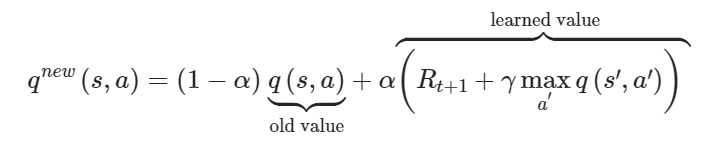

In [8]:
# Q-learning algorithm
for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset()[0]
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):

        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()

        # Take new action
        new_state, reward, done, truncated, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
          learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        # Set new state
        state = new_state
        # Add new reward
        rewards_current_episode += reward
        if done == True:
            break
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
      (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

# After All Episodes Complete
After all episodes are finished, we now just calculate the average reward per thousand episodes from our list that contains the rewards for all episodes so that we can print it out and see how the rewards changed over time.

In [9]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.047000000000000035
2000 :  0.19300000000000014
3000 :  0.3900000000000003
4000 :  0.5670000000000004
5000 :  0.6510000000000005
6000 :  0.6870000000000005
7000 :  0.6780000000000005
8000 :  0.6580000000000005
9000 :  0.6810000000000005
10000 :  0.6940000000000005


From this printout, we can see our average reward per thousand episodes did indeed progress over time.

Let's take a second to understand how we can interpret these results. Our agent played 10,000 episodes. At each time step within an episode, the agent received a reward of 1 if it reached the frisbee, otherwise, it received a reward of 0. If the agent did indeed reach the frisbee, then the episode finished at that time-step.

So, that means for each episode, the total reward received by the agent for the entire episode is either 1 or 0. So, for the first thousand episodes, we can interpret this score as meaning that **4.7%**
 of the time, the agent received a reward of 1 and won the episode. And by the last thousand episodes from a total of 10,000, the agent was winning **69%**
 of the time.

By analyzing the grid of the game, we can see it's a lot more likely that the agent would fall in a hole or perhaps reach the max time steps than it is to reach the frisbee, so reaching the frisbee **69%**
 of the time isn't too shabby, especially since the agent had no explicit instructions to reach the frisbee. It learned that this is the correct thing to do.

In [10]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.57617523 0.51179763 0.50619696 0.51292668]
 [0.35517267 0.3367263  0.22282723 0.50427996]
 [0.37896196 0.41452894 0.40819441 0.46770514]
 [0.31445764 0.31223164 0.27752479 0.45011448]
 [0.59386366 0.35983845 0.40018403 0.44517434]
 [0.         0.         0.         0.        ]
 [0.15248667 0.06961912 0.32811501 0.17051614]
 [0.         0.         0.         0.        ]
 [0.40858771 0.39588637 0.37958111 0.61569703]
 [0.40472402 0.68597851 0.43382239 0.41494606]
 [0.66545756 0.46727347 0.39905177 0.38098717]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.38745283 0.54902846 0.76268308 0.51115552]
 [0.68715582 0.88390874 0.72242464 0.69866684]
 [0.         0.         0.         0.        ]]


# **Let's Watch the Agent Play**
These blocks of code are going to allow us to watch our trained agent play Frozen Lake using the knowledge it's gained from the training we completed.

In [11]:
env = gym.make('FrozenLake-v1', render_mode='rgb_array') #change to rgb view

In [12]:
# Imports for video creation
import cv2
from gym.wrappers.record_video import RecordVideo
from IPython.display import display, HTML
import io
import base64
from google.colab.patches import cv2_imshow
from moviepy.editor import VideoFileClip, AudioFileClip

  from scipy.ndimage.filters import sobel



In [13]:
#x = states_tryout[0] # Just checking the size of the images in future video
#x.shape
#print(states_tryout)

  and should_run_async(code)



In [15]:
# Create Images for winning or loosing
image_path_fell = 'you fell.jpg'
image_fell = cv2.imread(image_path_fell)
image_path_goal = 'you win.jpg'
image_goal = cv2.imread(image_path_goal)
image_fell = cv2.resize(image_fell, (256, 256), interpolation=cv2.INTER_AREA)
image_goal = cv2.resize(image_goal, (256, 256), interpolation=cv2.INTER_AREA)
#cv2_imshow(image)


In [16]:
##Visualise
# Watch our agent play Frozen Lake by playing the best action
# from each state according to the Q-table
states_tryout = []
for episode in range(num_episodes - 3, num_episodes):
    # initialize new episode params
    state = env.reset()[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        #print(env.render())
        #time.sleep(0.6)
        states_tryout.append(env.render())
        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state,:])
        # Take new action
        new_state, reward, done, truncated, info = env.step(action)

        if done:
            clear_output(wait=True)
            states_tryout.append(env.render())
            #print(env.render())
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You reached the goal!****")
                states_tryout.append(image_goal)
                states_tryout.append(image_goal)
                states_tryout.append(image_goal)
                time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode
                print("****You fell through a hole!****")
                states_tryout.append(image_fell)
                states_tryout.append(image_fell)
                states_tryout.append(image_fell)
                time.sleep(3)
                clear_output(wait=True)
            break
        state = new_state

****You reached the goal!****


In [17]:
def creat_video(name,states_tryout):
    #states_tryout = create_more_data( )


    image_arrays = np.array(states_tryout)

    # Define the video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    video_writer = cv2.VideoWriter('output_video_{}.mp4'.format(name), fourcc, 4.0, (image_arrays[0].shape[1], image_arrays[0].shape[0]))

    # Write each frame to the video file
    for image_array in image_arrays:
        video_writer.write(image_array)

    # Release the video writer
    video_writer.release()

    # Display the video in Colab
    video_path = 'output_video_{}.mp4'.format(name)
    video_file = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video_file)
    HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii')))
    return

In [18]:
creat_video("test",states_tryout)

# Create Video with Background Music !

In [19]:

def create_video(name, states_tryout, music_path='path/to/your/music.mp3'):
    # Convert image arrays to a video
    image_arrays = np.array(states_tryout)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter('output_video_{}.mp4'.format(name), fourcc, 4.0, (image_arrays[0].shape[1], image_arrays[0].shape[0]))
    for image_array in image_arrays:
        video_writer.write(image_array)
    video_writer.release()

    # Load the video clip
    video_clip = VideoFileClip('output_video_{}.mp4'.format(name))

    # Load the audio clip
    audio_clip = AudioFileClip(music_path)

    # Trim audio to match the duration of the video
    audio_clip = audio_clip.subclip(0, video_clip.duration)

    # Add the audio to the video clip
    video_clip = video_clip.set_audio(audio_clip)

    # Write the final video with audio
    video_clip.write_videofile('output_video_with_audio_{}.mp4'.format(name), codec='libx264', audio_codec='aac')

    # Display the video with audio in Colab
    video_path = 'output_video_with_audio_{}.mp4'.format(name)
    video_file = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video_file)
    HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii')))

# Example usage
# create_video('example', states_tryout, music_path='path/to/your/music.mp3')


In [21]:
create_video("test_audio",states_tryout,'33. Guile Stage.mp3')

Moviepy - Building video output_video_with_audio_test_audio.mp4.
MoviePy - Writing audio in output_video_with_audio_test_audioTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video output_video_with_audio_test_audio.mp4



Moviepy - Done !
Moviepy - video ready output_video_with_audio_test_audio.mp4


In [22]:
env.close() # Finish up and close the environment

Sources :

Reinforcement Learning: An Introduction, Second Edition by Richard S. Sutton and Andrew G. Bartow
http://incompleteideas.net/book/RLbook2020.pdf

Playing Atari with Deep Reinforcement Learning by Deep Mind Technologies

https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf

https://deeplizard.com/course/rlcpailzrd